1번 문제

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage


c1 = np.array([[30, 10, 20], [25, 8, 18], [20, 6, 15], [15, 5, 12]])
c2 = np.array([[10, 3, 8], [12, 4, 10], [18, 7, 14], [22, 8, 16]])


data = np.vstack((c1, c2))


distances = pdist(data)
dist_matrix = squareform(distances)


linkage_single = linkage(data, method='single')  # Dmin
linkage_complete = linkage(data, method='complete')  # Dmax
linkage_average = linkage(data, method='average')  # Davg


Dmin = np.min(linkage_single[:, 2])
Dmax = np.max(linkage_complete[:, 2])
Dave = np.mean(linkage_average[:, 2])


mean_c1 = np.mean(c1, axis=0)
mean_c2 = np.mean(c2, axis=0)


D_mean = np.linalg.norm(mean_c1 - mean_c2)
D_rep = D_mean  

print("Dmax:",Dmax)
print("Dmin:",Dmin)
print("Dave:",Dave)
print("Dmean:",D_mean)
print("Drep:",D_rep)


Dmax: 24.351591323771842
Dmin: 2.449489742783178
Dave: 6.76534279317464
Dmean: 8.374067112222113
Drep: 8.374067112222113


2-1

[[ 0.          5.74456265 11.87434209 17.72004515 24.35159132 21.44761059
  13.74772708  9.16515139]
 [ 5.74456265  0.          6.164414   12.04159458 18.70828693 15.77973384
   8.1240384   3.60555128]
 [11.87434209  6.164414    0.          5.91607978 12.56980509  9.64365076
   2.44948974  3.        ]
 [17.72004515 12.04159458  5.91607978  0.          6.70820393  3.74165739
   4.12310563  8.60232527]
 [24.35159132 18.70828693 12.56980509  6.70820393  0.          3.
  10.77032961 15.26433752]
 [21.44761059 15.77973384  9.64365076  3.74165739  3.          0.
   7.81024968 12.32882801]
 [13.74772708  8.1240384   2.44948974  4.12310563 10.77032961  7.81024968
   0.          4.58257569]
 [ 9.16515139  3.60555128  3.          8.60232527 15.26433752 12.32882801
   4.58257569  0.        ]]


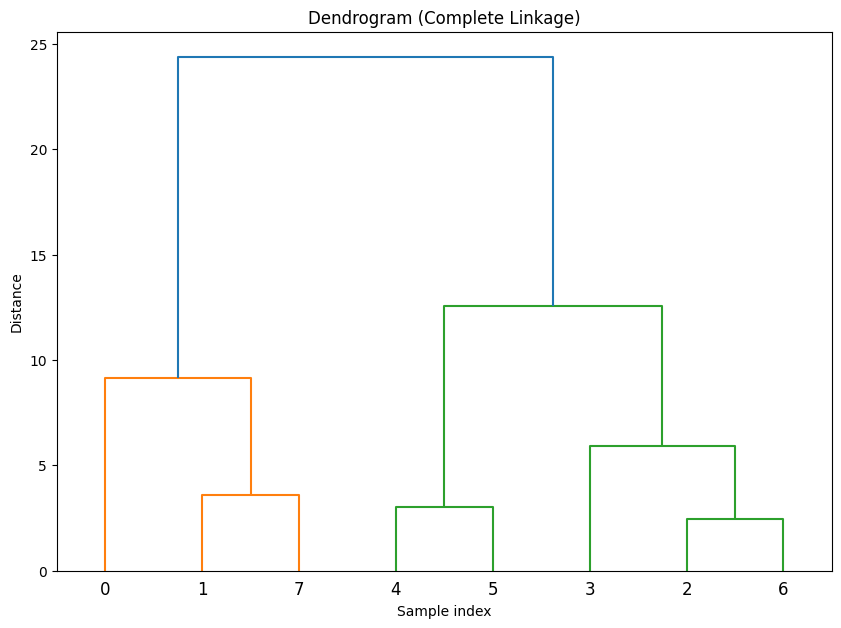

Clusters (Complete Linkage): [0 0 1 1 2 2 1 0]


C:\Users\ialle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ialle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ialle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ialle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ialle\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) mi

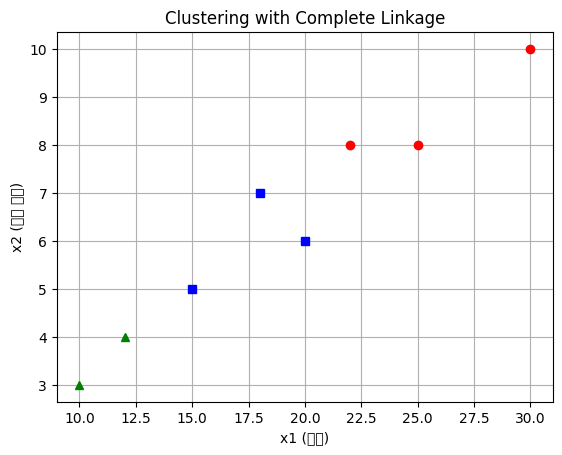

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 주어진 데이터 정의
data = np.array([
    [30, 10, 20],
    [25, 8, 18],
    [20, 6, 15],
    [15, 5, 12],
    [10, 3, 8],
    [12, 4, 10],
    [18, 7, 14],
    [22, 8, 16]
])

# 거리 행렬 계산
dist_p = squareform(pdist(data, metric='euclidean'))
print(dist_p)

# 계층적 클러스터링 (완전 연결법)
linkage_complete = linkage(data, method='complete')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(linkage_complete)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# 3개의 군집으로 나누기
cluster_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_complete = cluster_complete.fit_predict(data)

print("Clusters (Complete Linkage):", y_complete)

# 클러스터링 결과 시각화
plt.title("Clustering with Complete Linkage")
colors = ['ro', 'bs', 'g^']
for i in range(3):
    plt.plot(data[y_complete == i, 0], data[y_complete == i, 1], colors[i])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()
